## 1. Import the libraries

In [54]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500) 
pd.set_option('display.max_rows', 500) 

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 

## 2. Importing data files

### 2.1 Backup of application and previous application file

In [55]:
df_Credit_backup = pd.read_csv("Credit_data.csv")

### 2.2  importing Application file

In [56]:
Credit_data = pd.read_csv("Credit_data.csv")
Credit_data.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,1.0,2
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,2.0,1
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,1.0,2
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,2.0,2
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,1.0,2


## 3. Checking structure of data in Application file

In [57]:
print('Size of Credit_data', Credit_data.shape)

Size of Credit_data (307511, 21)


In [58]:
Credit_data.columns.values

array(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT'], dtype=object)

In [59]:
Credit_data.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 21 columns):
SK_ID_CURR                    307511 non-null int64
TARGET                        307511 non-null int64
CNT_CHILDREN                  307511 non-null int64
AMT_INCOME_TOTAL              307511 non-null float64
AMT_CREDIT                    307511 non-null float64
AMT_ANNUITY                   307499 non-null float64
AMT_GOODS_PRICE               307233 non-null float64
REGION_POPULATION_RELATIVE    307511 non-null float64
DAYS_BIRTH                    307511 non-null int64
DAYS_EMPLOYED                 307511 non-null int64
DAYS_REGISTRATION             307511 non-null float64
DAYS_ID_PUBLISH               307511 non-null int64
OWN_CAR_AGE                   104582 non-null float64
FLAG_MOBIL                    307511 non-null int64
FLAG_EMP_PHONE                307511 non-null int64
FLAG_WORK_PHONE               307511 non-null int64
FLAG_CONT_MOBILE              307511 non-nu

In [60]:
Credit_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,11.944812,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,5.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,9.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,15.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,3.000000,2.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,91.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,3.000000


## 4. Missing Values and Data Quality check

### 4.1 Percentage of missing values columnwise

In [61]:
100*Credit_data.isnull().sum()/len(Credit_data)


SK_ID_CURR                     0.000000
TARGET                         0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
OWN_CAR_AGE                   65.990810
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000
CNT_FAM_MEMBERS                0.000650
REGION_RATING_CLIENT           0.000000
dtype: float64

### 4.2 Removing coulmns 

###### 4.2.1Removing coulmns with high missing percentage 

In [62]:
Credit_data.drop(Credit_data.columns[(100*Credit_data.isnull().sum()/len(Credit_data))>=50], axis=1, inplace= True)

In [63]:
# Checking the column name and shape after dropping columns
print(Credit_data.columns)
print('Size of application_data', Credit_data.shape)

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT'],
      dtype='object')
Size of application_data (307511, 20)


#### 4.3 Missing Value Imputation

###### 4.3.1 Getting columns having missing values

In [64]:
print(Credit_data.columns[100*Credit_data.isnull().sum()/len(Credit_data) > 0].tolist())

['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS']


mean      27108.573909
median    24903.000000
Name: AMT_ANNUITY, dtype: float64
mean      538396.207429
median    450000.000000
Name: AMT_GOODS_PRICE, dtype: float64
mean      2.152665
median    2.000000
Name: CNT_FAM_MEMBERS, dtype: float64


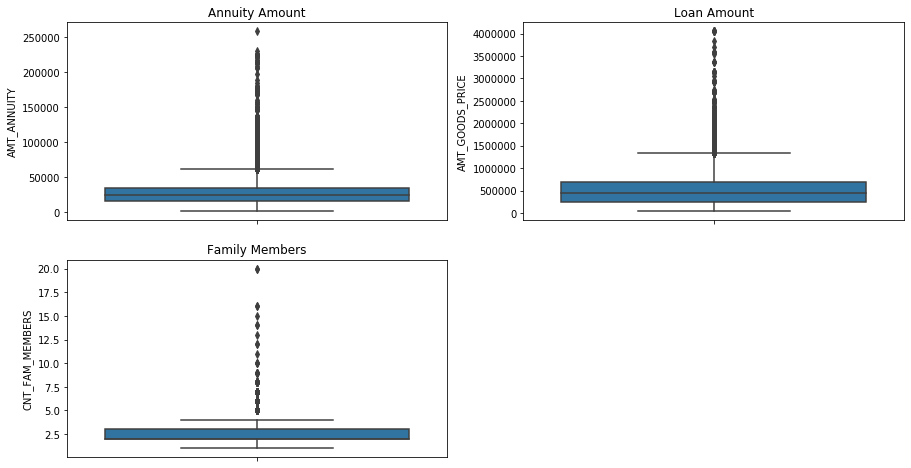

In [65]:
#plotting Box plot to get outliers in order to get the values for outliers in order get imputing values for variables.

plt.figure(1,figsize=(15,8)) 

# create 1st subplot:
plt.subplot(2,2,1) 
plt.title('Annuity Amount')
sns.boxplot(y=Credit_data["AMT_ANNUITY"])

# cretae 2nd subplot:
plt.subplot(2,2,2) 
plt.title('Loan Amount')
sns.boxplot(y=Credit_data["AMT_GOODS_PRICE"])

# cretae 3rd subplot:
plt.subplot(2,2,3)
plt.title('Family Members')
sns.boxplot(y=Credit_data["CNT_FAM_MEMBERS"])


# Getting mean and medial for all 4 variables 
print (Credit_data["AMT_ANNUITY"].aggregate(['mean', 'median']))
print(Credit_data["AMT_GOODS_PRICE"].aggregate(['mean', 'median']))
print(Credit_data["CNT_FAM_MEMBERS"].aggregate(['mean', 'median']))

##### Imputation Menthod
- ###### As per Box plot its clearly visible that AMT_ANNUITY is having less ouliers where as AMT_GOODS_PRICE is having more outlires, hence missing values can br imputed as below:

- ###### AMT_ANNUITY is having more outlires so missing values can be imputed with median value which is 24903

- ###### AMT_GOODS_PRICE is having more outlires so missing values can be imputed with median value which is 450000

- ###### CNT_FAM_MEMBERS is having less outlires so missing values can be imputed with mean value which is 2 after rounding off.

In [66]:
Credit_data['AMT_ANNUITY']= Credit_data['AMT_ANNUITY'].replace(np.NAN,24903)
Credit_data['AMT_GOODS_PRICE']= Credit_data['AMT_GOODS_PRICE'].replace(np.NAN,450000)
Credit_data['CNT_FAM_MEMBERS']= Credit_data['CNT_FAM_MEMBERS'].replace(np.NAN,2)

In [67]:
Credit_data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
FLAG_MOBIL                      int64
FLAG_EMP_PHONE                  int64
FLAG_WORK_PHONE                 int64
FLAG_CONT_MOBILE                int64
FLAG_PHONE                      int64
FLAG_EMAIL                      int64
CNT_FAM_MEMBERS               float64
REGION_RATING_CLIENT            int64
dtype: object

######  converting negative values of columns to postive values

In [68]:
# Converting negative values of DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH as it should be in positve
cols_negative = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']

for i in cols_negative:
    Credit_data[i] = Credit_data[i].apply(lambda x: round(abs(x)))

In [69]:
Credit_data.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,3648,2120,1,1,0,1,1,0,1.0,2
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,1186,291,1,1,0,1,1,0,2.0,1
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,4260,2531,1,1,1,1,1,0,1.0,2
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,9833,2437,1,1,0,1,0,0,2.0,2
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,4311,3458,1,1,0,1,0,0,1.0,2


In [104]:
Credit_data["TARGET"].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

## 5. Checking for data balance

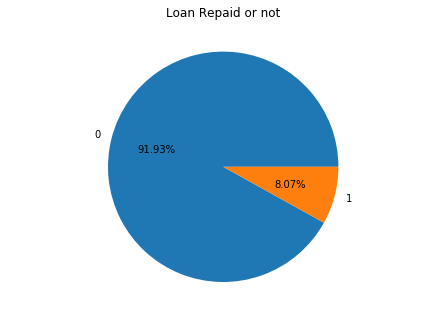

In [70]:
temp = Credit_data["TARGET"].value_counts()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(temp.values, labels= temp.index,autopct='%1.2f%%')
plt.title('Loan Repaid or not')
plt.show()

`Its highly imbalance as for Non Defaulters it's very high 91.93% and for Defaulters are only 8.07%`

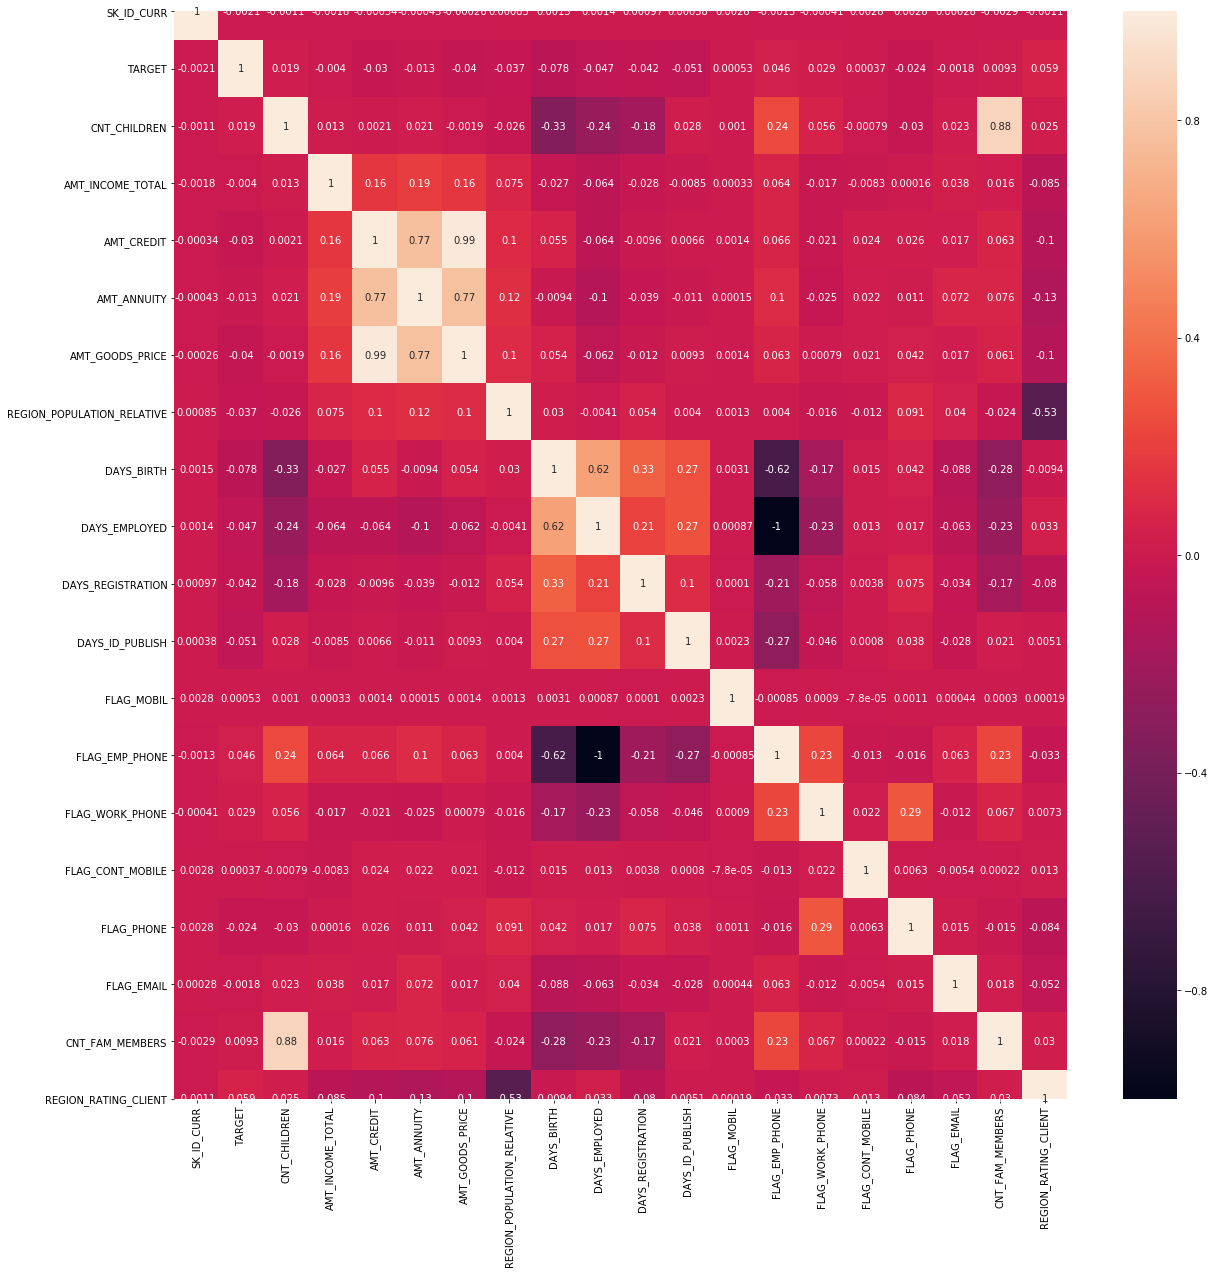

In [71]:
plt.figure(figsize=(20,20))
sns.heatmap(Credit_data.corr(), annot=True)
plt.show()

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X = Credit_data.drop(['TARGET'], axis=1)
y = Credit_data["TARGET"]

In [74]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 6. Logistic regression

In [75]:
from sklearn.linear_model import LogisticRegression
# create the object
model =  LogisticRegression()

model.fit(x_train, y_train)

# predict

y_predict = model.predict(x_test)

In [76]:
from sklearn.metrics import scorer, accuracy_score, f1_score, confusion_matrix, roc_auc_score,precision_score, recall_score
accuracy_score(y_predict, y_test)

0.9195161211648212

- By this accuracy we will tend to say that model is good but thats not tre, lets see precision and recall

## Handling Data Imbalance

### 1. Change the performance metric

In [77]:
confusion_matrix(y_predict, y_test)

array([[56553,  4949],
       [    1,     0]], dtype=int64)

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.00      0.00      0.00      4949

    accuracy                           0.92     61503
   macro avg       0.46      0.50      0.48     61503
weighted avg       0.85      0.92      0.88     61503



- By seeing on precision and recall score wchich is we can say its not a good model. Hence if data is imbalance, good classifier model shoul be assess by precision/Recall or F1 score  

## 2. Resampling

**1. Under sampling**

In [83]:
# import library
from collections import Counter
import imblearn

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)

# fit predictor and target varialbe
x_rus, y_rus = rus.fit_resample(X, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({0: 282686, 1: 24825})
Resample dataset shape Counter({0: 24825, 1: 24825})


- now both Class0 and Class 1 is having 2485 samples. Under sampling has removed records from Majority class randomly

#### Random Under sampling with sampling ratio

In [108]:
rus1 = RandomUnderSampler(random_state=42, replacement=True,sampling_strategy=0.5)

# fit predictor and target varialbe
x_rus1, y_rus1 = rus1.fit_resample(X, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus1))

original dataset shape: Counter({0: 282686, 1: 24825})
Resample dataset shape Counter({0: 49650, 1: 24825})


###  Logistic regression after Under Sampling

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x_rus, y_rus, test_size=0.2, random_state=42)
# create the object
model =  LogisticRegression()

model.fit(x_train, y_train)

# predict

y_predict = model.predict(x_test)

accuracy_score(y_predict, y_test)


0.5713997985901309

In [88]:
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

           0       0.57      0.56      0.57      4953
           1       0.57      0.58      0.57      4977

    accuracy                           0.57      9930
   macro avg       0.57      0.57      0.57      9930
weighted avg       0.57      0.57      0.57      9930



- Now after Under sampling accuracy is better than previous

**2. Over Sampling**

In [92]:
# import library
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target varaible
x_ros, y_ros = ros.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 282686, 1: 24825})
Resample dataset shape Counter({1: 282686, 0: 282686})


- now both Class0 and Class 1 is having 282686 samples. Over sampling has duplicated records from Minority class randomly

#### Random Over sampling with sampling ratio

In [97]:
ros1 = RandomOverSampler(random_state=42,sampling_strategy=0.5)

# fit predictor and target varaible
x_ros1, y_ros1 = ros1.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros1))

Original dataset shape Counter({0: 282686, 1: 24825})
Resample dataset shape Counter({0: 282686, 1: 141343})


###  Logistic regression after Over Sampling

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.2, random_state=42)
# create the object
model =  LogisticRegression()

model.fit(x_train, y_train)

# predict

y_predict = model.predict(x_test)

accuracy_score(y_predict, y_test)


0.5754852973690029

In [95]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.58      0.58      0.58     56536
           1       0.58      0.58      0.58     56539

    accuracy                           0.58    113075
   macro avg       0.58      0.58      0.58    113075
weighted avg       0.58      0.58      0.58    113075



**Summary:** In this particular dataset Over sampling is performing better than Under sampling as Accuracy, Precision and Recall scores are more

### 3. SMOTE

In [96]:
# load library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit target and predictor variable
x_smote , y_smote = smote.fit_sample(X, y)

print('Origianl dataset shape:', Counter(y))
print('Resampple dataset shape:', Counter(y_smote))

Origianl dataset shape: Counter({0: 282686, 1: 24825})
Resampple dataset shape: Counter({1: 282686, 0: 282686})


- SMOTE has created synthtic instances for Minority class

#### SMOTE with sampling ratio

In [109]:
smote = SMOTE(sampling_strategy=0.5)

# fit target and predictor variable
x_smote , y_smote = smote.fit_sample(X, y)

print('Origianl dataset shape:', Counter(y))
print('Resampple dataset shape:', Counter(y_smote))

Origianl dataset shape: Counter({0: 282686, 1: 24825})
Resampple dataset shape: Counter({0: 282686, 1: 141343})


### 4. Choose Different Algorithm

- Using Tree based algorithm Random Forest

In [100]:
# load library
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(x_train, y_train)

# predict
rfc_predict = rfc.predict(x_test)

In [101]:
# check performance

print('ROCAUC score:',roc_auc_score(y_test, rfc_predict))
print('Accuracy score:',accuracy_score(y_test, rfc_predict))
print('F1 score:',f1_score(y_test, rfc_predict))

ROCAUC score: 0.9991156086928809
Accuracy score: 0.999115631218218
F1 score: 0.9991164048279639


In [103]:
print(classification_report(y_test, rfc_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56536
           1       1.00      1.00      1.00     56539

    accuracy                           1.00    113075
   macro avg       1.00      1.00      1.00    113075
weighted avg       1.00      1.00      1.00    113075



- By looking on Scores we can say Random forest has performed better than logistic classification